In [82]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
df = pd.read_csv('data.csv')

In [83]:
df.describe()

,Sepal width,Sepal length
count,150.000000,150.000000
mean,5.843333,3.057333
std,0.828066,0.435866
min,4.300000,2.000000
25%,5.100000,2.800000
50%,5.800000,3.000000
75%,6.400000,3.300000
max,7.900000,4.400000


Text(0, 0.5, 'Sepal length')

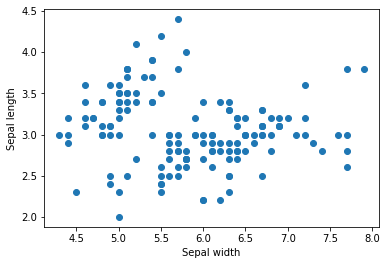

In [84]:
#1. Find the elbow(Elbow Technique)
plt.scatter(df['Sepal width'], df['Sepal length'])
plt.xlabel('Sepal width')
plt.ylabel('Sepal length')

In [85]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [86]:
y_predicted = km.fit_predict(df[['Sepal width', 'Sepal length']])
y_predicted

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [87]:
df['cluster'] = y_predicted
df.head()

,Sepal width,Sepal length,cluster
0,5.1,3.5,2
1,4.9,3.0,2
2,4.7,3.2,2
3,4.6,3.1,2
4,5.0,3.6,2


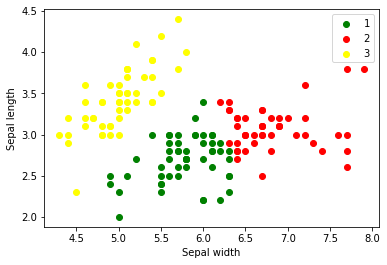

In [88]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1['Sepal width'], df1['Sepal length'], color='green', label='1')
plt.scatter(df2['Sepal width'], df2['Sepal length'], color='red', label='2')
plt.scatter(df3['Sepal width'], df3['Sepal length'], color='yellow', label='3')
plt.xlabel('Sepal width')
plt.ylabel('Sepal length')
plt.legend()

In [89]:
scaler=MinMaxScaler()
scaler.fit(df[['Sepal length']])
df['Sepal length'] = scaler.transform(df['Sepal length'].values.reshape(-1, 1))
scaler.fit(df[['Sepal width']])
df['Sepal width'] = scaler.transform(df['Sepal width'].values.reshape(-1, 1))
df.head()


,Sepal width,Sepal length,cluster
0,0.222222,0.625000,2
1,0.166667,0.416667,2
2,0.111111,0.500000,2
3,0.083333,0.458333,2
4,0.194444,0.666667,2


In [92]:
df['cluster1'] = df['cluster']

In [93]:
df.head()

,Sepal width,Sepal length,cluster,cluster1
0,0.222222,0.625000,2,2
1,0.166667,0.416667,2,2
2,0.111111,0.500000,2,2
3,0.083333,0.458333,2,2
4,0.194444,0.666667,2,2


In [94]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Sepal width', 'Sepal length']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [95]:
df['cluster'] = y_predicted
df.drop('cluster1', axis='columns', inplace=True)
df

,Sepal width,Sepal length,cluster
0,0.222222,0.625000,1
1,0.166667,0.416667,1
2,0.111111,0.500000,1
3,0.083333,0.458333,1
4,0.194444,0.666667,1
...,...,...,...
145,0.666667,0.416667,2
146,0.555556,0.208333,0
147,0.611111,0.416667,2
148,0.527778,0.583333,2


In [97]:
km.cluster_centers_

array([[0.40483539, 0.28009259],
       [0.19897959, 0.60459184],
       [0.69562648, 0.45390071]])

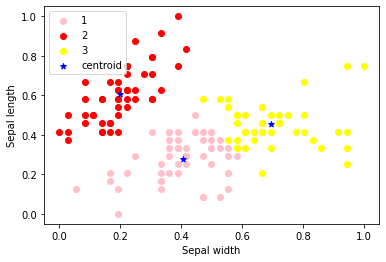

In [102]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1['Sepal width'], df1['Sepal length'], color='pink', label='1')
plt.scatter(df2['Sepal width'], df2['Sepal length'], color='red', label='2')
plt.scatter(df3['Sepal width'], df3['Sepal length'], color='yellow', label='3')
plt.xlabel('Sepal width')
plt.ylabel('Sepal length')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='blue', marker='*', label='centroid')
plt.legend()

In [103]:
##elbow plot method
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Sepal width', 'Sepal length']])
    sse.append(km.inertia_) ##SSE
    

Text(0, 0.5, 'SSE')

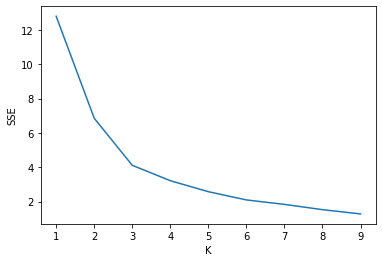

In [106]:
plt.plot(k_rng, sse)
plt.xlabel('K')
plt.ylabel('SSE')
##답은 3개의 K